In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

pd.set_option('display.max_columns', None)

α = 0.5

In [3]:
R = pd.read_csv("data/R.csv") #From DB5 dataset | log data
subset_ids = pd.read_csv("data/R_ids_alpha_0.6556.csv")
data_complete = (R[R.id.isin(subset_ids.id.values)]).reset_index(drop=True)
data_complete

,ind,id,PHASE,TOK,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,TAUTH,DATE,SHOT,TIME,Q95,ZEFF,AMIN,VOL,POHM,PNBI,DWDIA,DWMHD,PICRH,PECRH,PL,PFLOSS,TAV,LCOULOMB,QCYL5,TAUBOHM,RHOSTAR,BETASTAR,NUSTAR,OMEGACYCL
0,13947,ZUEQ42,HGELM,AUG,-0.002904,0.919486,1.962908,1.488400,0.509825,0.464991,-1.206780,0.693147,-2.409169,19960502,8006,3.400,1.380528,NaN,0.4981,12.9800,400100.0,4981000.0,3578.0,17380.0,0.0,0.0,5320000.0,887000.0,1020.565150,15.028261,1.103085,0.112722,-5.257599,-0.198716,-1.282967,1.254000
1,13956,X1F9P2,HSELM,AUG,-0.228030,0.653886,2.013836,1.796747,0.509224,0.476234,-1.212624,0.405465,-2.961524,19960503,8030,2.550,1.345212,NaN,0.4949,12.9500,425000.0,7078000.0,559.5,-34700.0,0.0,0.0,7450000.0,1415000.0,761.312828,14.709729,1.060839,0.066331,-5.275929,0.090343,-0.701408,1.282000
2,13977,NIJVMQ,HSELM,AUG,0.179818,1.089908,2.244002,1.202972,0.512824,0.479954,-1.231289,0.693147,-2.084253,19960509,8092,2.250,1.316676,NaN,0.4875,12.6600,757200.0,2907000.0,NaN,-85120.0,0.0,0.0,3750000.0,426000.0,820.096900,14.669024,1.057740,0.184983,-5.515855,-0.477155,-0.594271,1.487000
3,13978,VZ4LZ6,HSELM,AUG,0.179818,1.089908,2.276344,1.193922,0.511625,0.473747,-1.226609,0.693147,-2.096384,19960509,8092,3.350,1.315872,NaN,0.4892,12.6500,850900.0,2872000.0,NaN,-9415.0,0.0,0.0,3740000.0,442300.0,779.255665,14.601770,1.059743,0.182752,-5.544878,-0.495897,-0.470573,1.487000
4,13987,83UOI4,HGELM,AUG,-0.225521,0.704087,1.755614,0.797507,0.505612,0.478716,-1.209820,0.693147,-2.077044,19960509,8096,3.000,1.394511,NaN,0.4945,12.9200,339000.0,2067000.0,7805.0,11510.0,0.0,0.0,2400000.0,170400.0,882.464134,14.986514,1.112370,0.126678,-5.107644,-0.120606,-1.192622,1.011000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,24910,UAAXGA,HSELM,START,-1.539912,-1.318262,1.555404,-0.198451,-1.225537,0.406132,-0.273254,0.530628,-6.026470,19971111,34882,0.041,1.732540,NaN,0.2234,0.4340,399900.0,846000.0,NaN,0.0,0.0,0.0,1246000.0,425900.0,228.006993,13.733277,0.582357,0.000380,-3.048642,2.370540,-2.439489,0.157412
1481,24911,4WDZ33,HSELM,START,-1.643512,-1.293898,1.617803,-0.252186,-1.250366,0.389336,-0.261945,0.530628,-6.103067,19971111,34887,0.041,1.835138,NaN,0.2204,0.4052,353600.0,835000.0,NaN,-40000.0,0.0,0.0,1229000.0,451500.0,201.397272,13.577981,0.656964,0.000361,-3.121535,2.260113,-2.107454,0.161294
1482,24913,FLO8WI,HSELM,START,-1.530165,-1.302321,1.514468,-0.332401,-1.236496,0.411447,-0.278996,0.530628,-5.977956,19980303,36078,0.042,1.677283,NaN,0.2197,0.4173,330600.0,857000.0,NaN,30000.0,0.0,0.0,1158000.0,440400.0,226.703215,13.748011,0.524587,0.000405,-3.050749,2.291987,-2.527999,0.159941
1483,24914,S0BPRS,HSELM,START,-1.531089,-1.272966,1.609438,-0.904362,-1.267623,0.412110,-0.270891,0.530628,-5.591079,19980303,36079,0.043,1.670345,NaN,0.2147,0.3870,404800.0,0.0,NaN,0.0,0.0,0.0,404800.0,0.0,184.744734,13.495859,0.525547,0.000615,-3.159416,2.123580,-2.084532,0.164706


In [4]:
data_complete.columns

Index(['ind', 'id', 'PHASE', 'TOK', 'IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA',
       'EPS', 'MEFF', 'TAUTH', 'DATE', 'SHOT', 'TIME', 'Q95', 'ZEFF', 'AMIN',
       'VOL', 'POHM', 'PNBI', 'DWDIA', 'DWMHD', 'PICRH', 'PECRH', 'PL',
       'PFLOSS', 'TAV', 'LCOULOMB', 'QCYL5', 'TAUBOHM', 'RHOSTAR', 'BETASTAR',
       'NUSTAR', 'OMEGACYCL'],
      dtype='object')

In [5]:
# FOR NOW, I am also not considering categorical data

not_useful_cols = ['ind', 'id', 'PHASE', 'DATE', 'SHOT', 'TOK']
data_cols = pd.Series(data_complete.columns)
data = data_complete[ data_cols[~data_cols.isin(not_useful_cols)].values ]
data = data.dropna(axis='columns')

# Standard Scaler
X = StandardScaler().fit_transform(data)
data = pd.DataFrame(X, columns=data.columns)

### Computing the distance between two points

Euclidean distance:

$$
    D^k_{ij} = \left( \frac{ x_{ik} - x_{jk} }{ max(F_k) - min(F_k) } \right)^2 
$$

$$
    D_{ij} = \left[ \sum^M_{k=1} \: D^k_{ij}\right]^{1/2}
$$

Where $F_k$ is the $k$-th column representing the $k$-th feature. With $k=1,\dots,M$ The $x_{ik}$ is the $i$-th point of the $k$-th feature; the same for $j$. With $i$,$j=1\ldots,N$. And $N$ being the total points of observations.


### Computing the similarity between two points

Defined as:

$$
    S_{ij} = e^{-\alpha \cdot D_{ij}}
$$

Where $\alpha$ is a parameter. Here $\alpha = 0.5$.

In [6]:
#23:37:42 - 23:39:30 --> Two min to run this cell. 

N, M = data.shape
D = [0]*M
D_ij = np.zeros((N,N))

def D_k(F_k):
    """
    Receives column to compute distance among points, of the k-th feature
    """
    ΔD = np.zeros((N,N))
    for i in range(N):
        for j in range(i,N):
            ΔD[i,j] = F_k[i] - F_k[j]
    Dk = np.square(ΔD/(max(F_k) - min(F_k)))
    Dk = Dk.T + Dk
    return Dk

for k in range(M):
    D[k] =  D_k( data[data.columns[k]] )
    D_ij += D[k]

D_ij = np.sqrt(D_ij)
S_ij = np.exp( - α * D_ij )

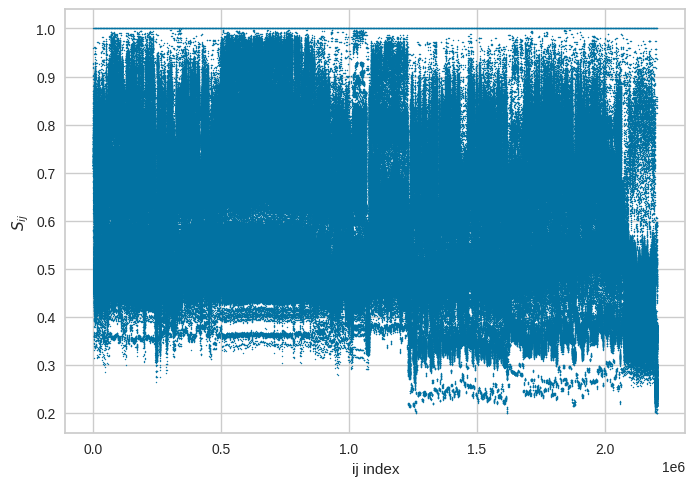

In [10]:
# Sanity Check -- S_ij ε [0,1]

y = S_ij.reshape((1, N**2))
x = range(N**2)

plt.scatter(x,y,s=0.5)
plt.xlabel("ij index")
plt.ylabel("$S_{ij}$");

### Computing the entropy of the dataset 

$$
    E = -\sum^N_{i=1}\sum^N_{j=1} E_{ij}= -\sum^N_{i=1}\sum^N_{j=1}\left[ S_{ij}\cdot\text{Log}\left(S_{ij}\right) +  \left(1-S_{ij}\right)\cdot\text{Log}\left(1-S_{ij}\right) \right]
$$

In [8]:
E_ij = ( S_ij*np.log(S_ij) + 
         (pd.DataFrame((1-S_ij)*np.log(1-S_ij)).fillna(0).to_numpy())
       )
E = - E_ij.sum()

"""
Warnings appear because of the diagonal being zero.
"""

/tmp/ipykernel_18613/3714462697.py:2: RuntimeWarning: divide by zero encountered in log
  (pd.DataFrame((1-S_ij)*np.log(1-S_ij)).fillna(0).to_numpy())
/tmp/ipykernel_18613/3714462697.py:2: RuntimeWarning: invalid value encountered in multiply
  (pd.DataFrame((1-S_ij)*np.log(1-S_ij)).fillna(0).to_numpy())


In [9]:
E

1385185.1206677877

In [1]:
import cupy as cp
